Here we will implement linear regression with one variable to predict profits for a food truck.  <br>
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new  
outlet. The chain already has trucks in various cities and you have data for profits and populations from  
the cities. <br>
The file ex1data1.txt  contains the dataset for our linear regression exercise.  <br>
The first column is the population of a city and the second column is the profit of  <br>
a food truck in that city. A negative value for profit indicates a loss. <br>
First, as with doing any machine learning task, we need to import certain libraries. <br>


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's read and have a look at the data <br>
Here we use the pandas read_csv function to read the comma separated values. <br>
Watch out as we are using US-formatted data : ',' to separate elements and '.' used as decimal separator  <br>
Also, we have used the head function to view the first few rows of our data.  <br>



In [44]:
data = pd.read_csv('Data/ex1data1.txt', header = None, delimiter = ",") #read from dataset
X = data.iloc[:,0] # read first column, will be put in a 'series' variable
y = data.iloc[:,1] # read second column, will be put in a 'series' variable
m = len(y) # number of training example (97)
print(data.head()) # view first few rows of the data


        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


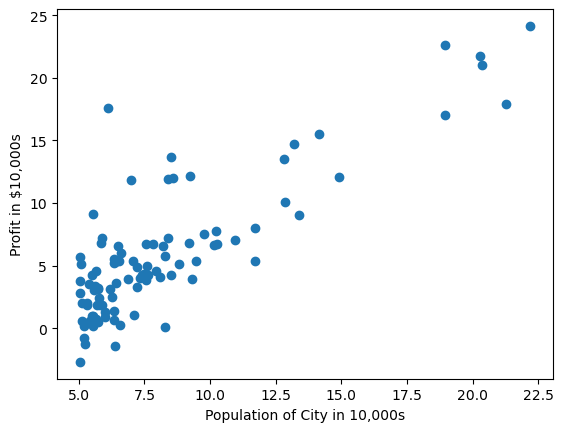

In [45]:
# Reading and Plotting the data
# Before starting on any task, try to visualize the data. 
# You can use a scatter plot to visualize this data, since it has only two properties to plot (profit and population).
# For multidimensional data : cannot be plotted on a 2-d or 3-d plot. 

plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()



Initializing and converting into an nparray, we want to make use of array manipulations (dot product eg) <br>
In the following lines, we add another dimension to our data to accommodate the intercept term,  <br>
we want to find the best values for Theta0 and Theta1 for the function y = Theta0 + Theta1 * x, by  <br>
getting the error/cost as small as possible.  <br>
We also initialize the initial parameters theta to 0 and the learning rate alpha to 0.01. <br>


In [46]:
print(type(X)) # should be a pd.Series()
X = X.to_numpy()[:,np.newaxis] # convert pd.Series() to an np.ndarray
y = y.to_numpy()[:,np.newaxis] # convert pd.Series() to an np.ndarray

# Will generate a warning:
# Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

# # Better w/o warning
# X = X.to_numpy()[:,np.newaxis] # convert pd.Series() to an np.ndarray
# y = y.to_numpy()[:,np.newaxis] # convert pd.Series() to an np.ndarray

theta = np.zeros([2,1]) # start off with a (0, 0) array
iterations = 100000 # 
alpha = 0.01 # magic number, defines the increase in change in Theta in every iteration we take

# apply the trick we saw in the classroom of 'all ones' for x0, so that we can use matrix multiplication 

mx = X.shape[0]
Xt = np.c_[np.ones((mx,1)), X]

<class 'pandas.core.series.Series'>


$$J = \frac{\sum_i{(y_i - \hat{y}_{i})^2}}{2N}$$
- $J$ : cost function
- $N$ : size
- $\hat{y}$ : predicted value
- $y$ : label

In [61]:
def computeCost(X, y, theta, m) -> float:
    """
    We are going to calculate the MSE (Mean Square Error).
    NOT the RMSE (Root Mean Square Error)
    Transpose operations of matrices are performed
    to follow the algebraic mathematical formula.
    This transpose is NOT needed but helps me to implement
    """
    # FILL IN THE NECESSARY CODE. Return the cost.
    ypred = np.matmul(theta.T, X.T)
    mse = np.sum(np.square(y.T - ypred)) / (2 * m)
    return mse

In [63]:
# What is the initial error/cost with the current theta0 and theta1 values = 0?
# Assign the cost value to the variable J
#
# FILL IN THE NECESSARY CODE.
#
#
#
theta = np.zeros([2, 1])
J = computeCost(Xt, y, theta, mx)
print(J)
# You get a cost of 32.072733877455676

32.072733877455676


$$\theta_j = \theta_j - \frac{\alpha}{m}\sum_{i=1}^m\left[(h_{\theta}(x^i) - y^i\right]x_j^i$$
$$h_{\theta}=\theta_i x_i$$

In [65]:
print(theta.T.shape)
print(Xt.T.shape)
print(y.T.shape)

(1, 2)
(2, 97)
(1, 97)


In [66]:
def gradientDescent(X, y, theta, alpha, iterations):
    # First work out what the partial derivatives are, then apply the gradientDescent 
    # Parameters:
    # -----------
    # X: matrix with the input variables
    # y: the correct results
    # alpha: learning rate
    # iterations: The number of times the gradientDescent should run.
    #
    # FILL IN THE NECESSARY CODE.After the iterations are performed, return the theta0 and theta1 values.
    for _ in range(iterations):
        h = np.matmul(theta.T, X.T)
        temp = h - y.T
        # temp has dimensions (1, 97), X has dimensions (97, 2)
        factor = np.matmul(temp, X)
        # factor has dimensions (1, 2), theta has dimensions (2,1)
        partial_derivatives = factor.T * alpha / len(X)
        theta -= partial_derivatives
    return theta

In [67]:
theta = gradientDescent(Xt, y, theta, alpha, iterations)
print(theta)
###  This should result in
#  [[-3.89578088]
#  [ 1.19303364]]
###    

[[-3.89578088]
 [ 1.19303364]]


In [22]:
# Can we improve on these results?
# Try with different values for the number of iterations and with different learning rates
# Try eg with as number of iterations: 500, 1500, 5000, 10000, 100000,...
# Try a different learning rate: 0.1, 0.03, 0.01, 0.003, 0.001, ...  



In [73]:
iter_values = [500, 1000, 1500, 10000, 1000000]
for iteration in iter_values:
    # init weights
    theta0 = np.zeros([2, 1])
    alpha = 0.01
    thetar = gradientDescent(Xt, y, theta0, alpha, iteration)
    J = computeCost(Xt, y, thetar, mx)
    print(f"Cost with {iteration} iterations: {J}")

Cost with 500 iterations: 4.713809531116866
Cost with 1000 iterations: 4.515955503078913
Cost with 1500 iterations: 4.483388256587726
Cost with 10000 iterations: 4.476971375975179
Cost with 1000000 iterations: 4.476971375975179


Cost with 500    iterations : 4.713809531116866 <br>
Cost with 1000   iterations : 4.515955503078912 <br>
Cost with 1500   iterations : 4.483388256587726 <br>
Cost with 10000  iterations : 4.476971375975179 <br>
Cost with 100000 iterations : 4.476971375975179 <br>

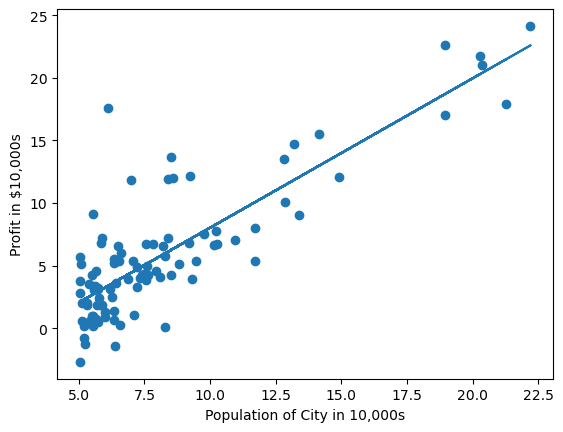

In [72]:
plt.scatter(Xt[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(Xt[:,1], np.dot(Xt, theta))
plt.show()
